In [1]:
from urllib.request import urlretrieve
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [13]:
# urlretrieve(data_url, 'medical_data.csv')

In [4]:
df = pd.read_csv('../data/medical_data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.shape

(1338, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [32]:
fig = px.histogram(df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [30]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [28]:
fig = px.histogram(df,
                   x = 'bmi',
                   marginal='box',
                   color_discrete_sequence=['green'],
                   title='Distribution of BMI')

fig.update_layout(bargap=0.1)
fig.show()

In [40]:
fig = px.histogram(df,
                   y='charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title='Distribution of Charges (Smokers highlighted)')

fig.update_layout(bargap = 0.1)
fig.show()


In [44]:
fig = px.histogram(df,
                   y = 'charges',
                   marginal = 'box',
                   color = 'region',
                   color_discrete_sequence=['red', 'blue', 'green', 'grey'],
                   title='Distribution of charges (sex highlighted)')

fig.update_layout(bargap=0.1)
fig.show()

In [45]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [46]:
px.histogram(df,x='smoker', color='sex', color_discrete_sequence=['red', 'green'],title='Smokers along with sex')

In [50]:
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color = 'smoker',
                 title = 'Age vs Charges (along with smoker)')

fig.update_traces(marker_size=5)
fig.show()

In [51]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 color = 'smoker',
                 title = 'BMI vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [52]:
df.charges.corr(df.age)

0.2990081933306478

In [53]:
df.charges.corr(df.bmi)

0.19834096883362887

In [54]:
smoker_vals = {'no':0 , 'yes': 1}
smoker_int = df.smoker.map(smoker_vals)
smoker_int

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [56]:
df.charges.corr(smoker_int)

0.7872514304984778

In [59]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation')

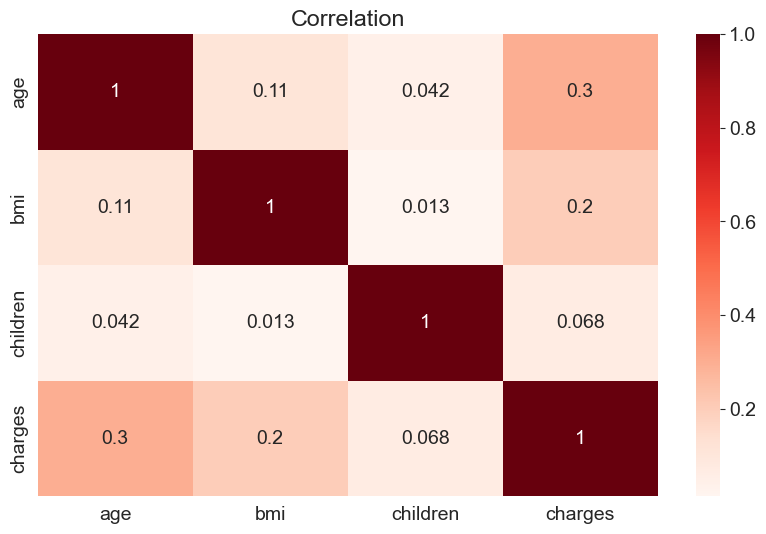

In [60]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation')

In [ ]:
fig = px.violin(df,x='charges', y='smoker', title='smoker vs charges')
fig.show()